### Exploratory Data Analysis (EDA) 

Name: Darren King
Student ID: 17145031

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression 
from scipy.stats.mstats import winsorize

In [2]:
#Load the requisite csv file into a dataframe

df = pd.read_csv('bank.csv')

In [3]:
#Let's have a peek at the data - print the 1st 10 rows of the dataframe
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59.0,retired,married,secondary,no,1035,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47.0,blue-collar,married,secondary,no,398,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54.0,retired,married,secondary,no,1004,yes,no,cellular,1,apr,479,1,307,1,failure,no
5,46.0,self-employed,divorced,tertiary,no,926,yes,no,cellular,1,apr,463,1,133,3,failure,no
6,34.0,blue-collar,married,secondary,no,1924,yes,yes,cellular,1,apr,161,2,253,1,failure,no
7,45.0,services,divorced,secondary,no,396,yes,yes,cellular,1,apr,251,4,329,4,failure,no
8,58.0,management,divorced,tertiary,no,315,yes,no,cellular,1,apr,121,2,135,2,failure,no
9,49.0,management,divorced,tertiary,no,20727,no,no,cellular,1,apr,285,3,132,2,failure,no


In [4]:
#Let's have a peek at the data - Print the last 10 rows of the dataframe
df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1990,36.0,technician,married,tertiary,no,376,no,no,cellular,16,sep,173,1,-1,0,NaN,yes
1991,39.0,admin.,divorced,secondary,no,112,no,no,cellular,16,sep,574,3,-1,0,NaN,yes
1992,78.0,retired,divorced,primary,no,527,no,no,cellular,16,sep,193,1,-1,0,NaN,yes
1993,35.0,management,married,NaN,no,2326,yes,yes,cellular,16,sep,319,1,-1,0,NaN,yes
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
#We can make the view of this data a little prettier
# Using pip: pip install pandas-profiling[notebook]
# Using conda: conda install -c conda-forge pandas-profiling 

import pandas_profiling
from pandas_profiling import ProfileReport

profile = ProfileReport(df, explorative=True, dark_mode=True)
profile.to_file('output_1.html')

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

The above file is saved as output.html and can be opened in any browser and being honest is a bit of a cheat, in particular as far as this e-tivity is concerned as it does all the work for ya, but why try and re-invent the wheel?  

The dataframe has 2000 rows containing both numerical and non-numerical or categorical data relating to direct marketing campaigns of a Portuguese banking institution. 
As per the UCI Machine Learning Repository bank.csv contains 17 inputs (or attributes) and relates to 10% of the bank-additional-full.csv dataset.

The attributes considered are:

Bank client data:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - balance

7 - housing: has housing loan? (categorical: 'no','yes','unknown')

8 - loan: has personal loan? (categorical: 'no','yes','unknown')

The following attributes are related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: 'cellular','telephone') 

10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

11 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

12 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

Other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

17 - Subscribed - Did the client subscribe to a term deposit account - yes or no. 

### Formulate a particular question that might be interesting to answer by exploring this dataset.

The core question I chose to look at was the relationship between the age (numerical) of the client and their bank balance (numerical). 
From there I endeavoured to look for relationships between these 2 numerical values and the categorical job/employment attribute. 
Finally, ignoring the core attributes of the campaign (contact, month, day_of_week, campaign, pdays, previous and poutcome) I wanted to see if any relationship existed between those attributes I had already explored and whether the client subscribed. 
Effectively I was looking at some of the main attributes that pre-dated the campaign to see if these factors showed a relationship with one another and with the ultimate outcome - Did the client subscribe to a term deposit account - yes or no?

Along the way I digress into mini-excursions which I'm chosing to leave in as they were learning points for me and may very well prove to be learning points for others but were not part of the core question I was looking at. 

### EDA of Numerical Attributes

Calculate statistics for the numerical attributes. Draw a short conclusion (approx. 150 words in a markdown cell)

I have commented and discussed in different markdown cells on the numerical statistics as I go through each of the points rather than grouping it all together in a single markdown where it won't make as much contextual sense. 

In [6]:
# Let's have a look at a statistical summary for all the numerical attributes of the dataframe

df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1988.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.753018,1413.663500,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.724358,3131.224213,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,31.000000,1823.000000,11.000000,854.000000,55.000000


In [7]:
# If we transpose this data it might appear a little clearer.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1988.0,41.753018,12.724358,18.0,32.00,38.0,50.0,93.0
balance,2000.0,1413.663500,3131.224213,-980.0,201.50,551.0,1644.5,81204.0
day,2000.0,13.851500,9.712189,1.0,5.00,12.0,23.0,31.0
duration,2000.0,292.020500,221.557295,7.0,146.00,236.0,379.0,1823.0
campaign,2000.0,1.909500,1.378862,1.0,1.00,1.0,2.0,11.0
pdays,2000.0,167.896000,131.754126,-1.0,75.75,182.0,251.0,854.0
previous,2000.0,2.561500,3.400735,0.0,1.00,2.0,3.0,55.0


From this we can see that there is missing data on the age of 12 of the customers. We can determine this number as a percentage (as demonstrated in the next cell). It's rather interesting that a bank wouldn't have this basic data on a client given one surely needs to know a clients DOB before opening a bank account - let's look at whether or not those for who we do not have an age opened a term deposit account (2 cells down). 
The mean age of the customers contacted was 41.7 years. 
The mean bank balance of the customers was 1413.66 with some lucky individual having 81204 in their account at the time these calls were made. This likely accounts for the skew in the data as seen with the mean income being 1413 and the median being 551.
The mean number of times an individual was called was 1.9 with some individual(s) being called 11 times (this is why nobody answers the phone to banks anymore). 

In [8]:
#Number of clients for whom we do not have an age
print(df.age.isna().sum())

#Percentage of clients for whom we do not have an age
df.age.isna().mean()*100

12


0.6

In [9]:
# Did anyone for whom the bank did not have an age open a bank account

no_age_and_subscribed = df[df.age.isna() & (df['subscribed'] == 'yes')]
no_age_and_subscribed.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1171,NaN,retired,married,tertiary,no,2812,no,no,cellular,3,aug,392,4,181,3,success,yes
1232,NaN,student,single,secondary,no,431,no,no,cellular,19,aug,418,11,185,5,success,yes
1408,NaN,self-employed,single,tertiary,no,251,no,no,cellular,12,jul,537,1,-1,0,NaN,yes


As the default for head() is 5 values and we only have 3, this means there were 3 individuals who subscribed for a term deposit account for which the bank has no age information. Dodgy dodgy. 

Let's do some correlation analysis between **Age** and Bank **Balance**

In [10]:
#Picking out the numerical data
df.select_dtypes("number")

,age,balance,day,duration,campaign,pdays,previous
0,32.0,392,1,957,2,131,2
1,39.0,688,1,233,2,133,1
2,59.0,1035,1,126,2,239,1
3,47.0,398,1,274,1,238,2
4,54.0,1004,1,479,1,307,1
...,...,...,...,...,...,...,...
1995,20.0,2785,16,327,2,-1,0
1996,28.0,127,16,1334,2,-1,0
1997,81.0,1154,17,231,1,-1,0
1998,46.0,4343,20,185,1,-1,0


In [11]:
#Let's look at the bank balances first, we will predominantly use 

df.balance.describe()

count     2000.000000
mean      1413.663500
std       3131.224213
min       -980.000000
25%        201.500000
50%        551.000000
75%       1644.500000
max      81204.000000
Name: balance, dtype: float64

So we can see that all 2000 clients have a bank balance with a mean balance of 1413.6635, someone is 980 overdrawn and as repeatedly mentioned, some lucky lad has 81204 waiting for a shopping spree. 

<AxesSubplot:title={'center':'Bank Balance Histogram'}, xlabel='Balance', ylabel='Client Numbers'>

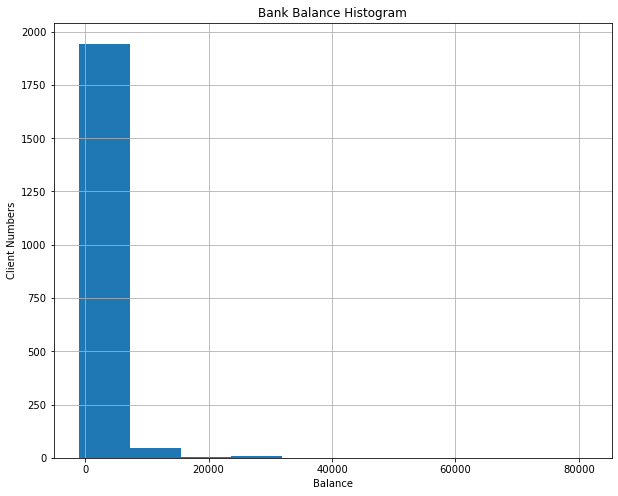

In [12]:
#What does this look like as a histogram?

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Bank Balance Histogram')
ax.set_xlabel("Balance")
ax.set_ylabel("Client Numbers")
df.balance.hist(ax=ax)

We can see that this plot is quite skewed based on the x axis - this is secondary to the max outlier who has a lovely balance of 81204. The histogram really allows us to see the skew caused by outliers. 

<AxesSubplot:title={'center':'Bank Balance Histogram'}, xlabel='Balance', ylabel='Client Numbers'>

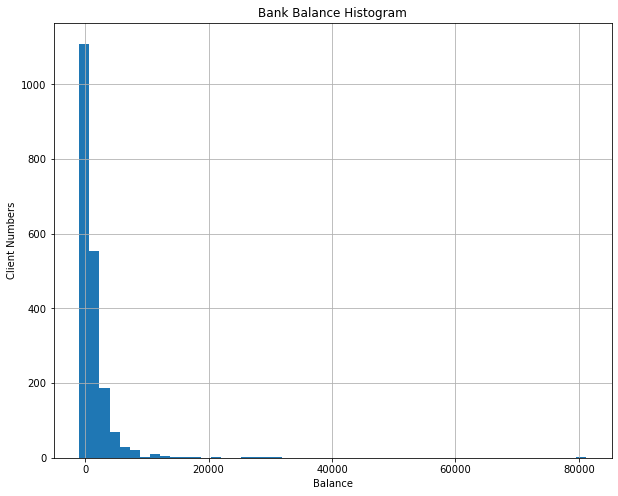

In [13]:
#Increase the number of bins to see what behaviours the skew might be hiding. 

fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Bank Balance Histogram')
ax.set_xlabel("Balance")
ax.set_ylabel("Client Numbers")
df.balance.hist(ax=ax, bins=50)

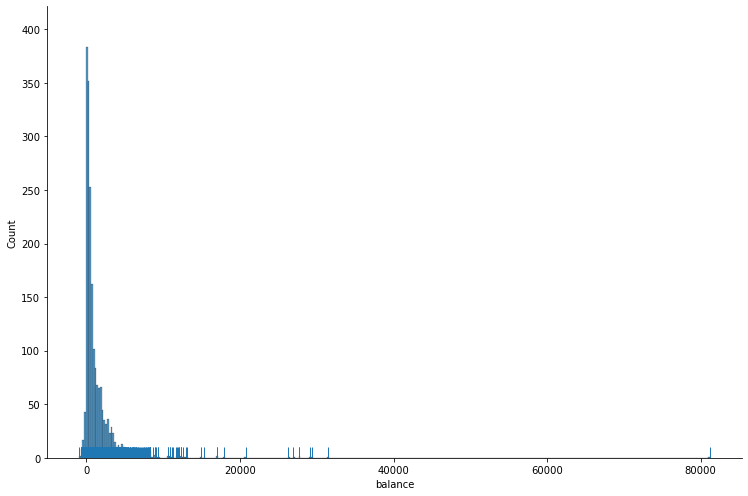

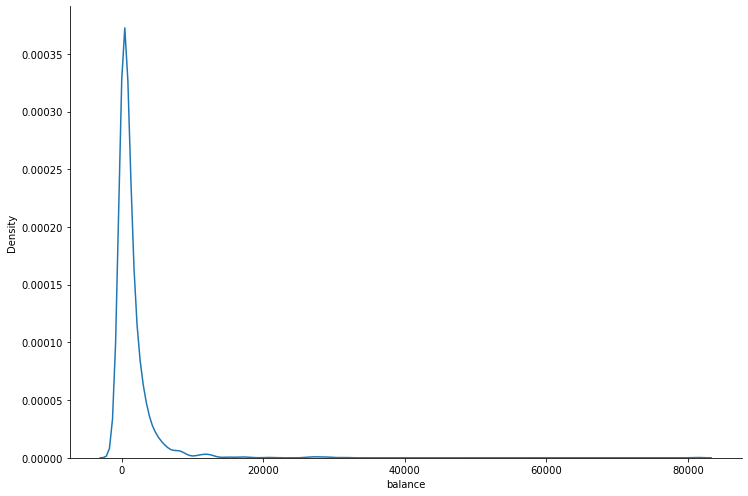

In [14]:
#We can create a distribution plot consisting of a histogram, a KDE and a rug plot to better understand 
#the bank balance distribution 


sns.displot(df.balance, kind='hist', height = 7, aspect = 1.5, rug=True)
sns.displot(df.balance, kind='kde', height = 7, aspect = 1.5, rug=False)

From the distribution plot we can see that lovely outlier, we can also see the little spikes as part of the rug plot.
The KDE (Kernel Density Estimation) allows us to visualise the probability density function (PDF) of the bank balance which as one of my colleagues astutely pointed out may poorly represent the underlying data. The logic of the KDE assumes that the underlying distribution is smooth and unbounded. In the case of a bank balance whilst the upper bound is arguably unbounded I'm not quite sure that the bank will be happy with an unbounded lower limit (especially given the data is from 2012 so the lessons of the crash will have been learned and inordinate overdrafts are likely a thing of the past). To compensate for this, we can use a smoothed KDE curve.

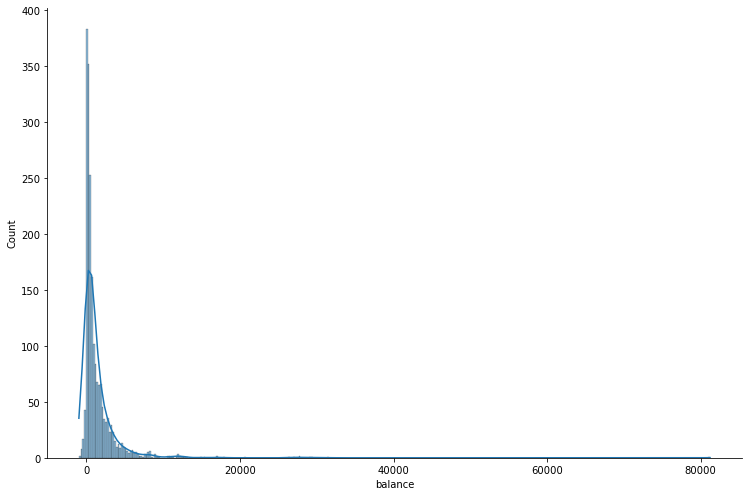

In [15]:
sns.displot(df.balance, kind='hist', height = 7, aspect = 1.5, kde=True)

We could equally visualise this data as a boxplot, violin polt or boxen plot which will be more striking once I've removed outliers so I will leave it until then. 

We could look at whether these balances are 'normal' by determining the p-value of the distribution. 

In [16]:
stats.kstest(df.balance, cdf="norm")

KstestResult(statistic=0.9036501019683699, pvalue=0.0)

With this p-value, the data is not normal, and we can look at this graphically. 

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([ -980,  -768,  -744, ..., 29340, 31472, 81204])),
 (1947.0768430357434, 1413.6635000000003, 0.6210430643297318))

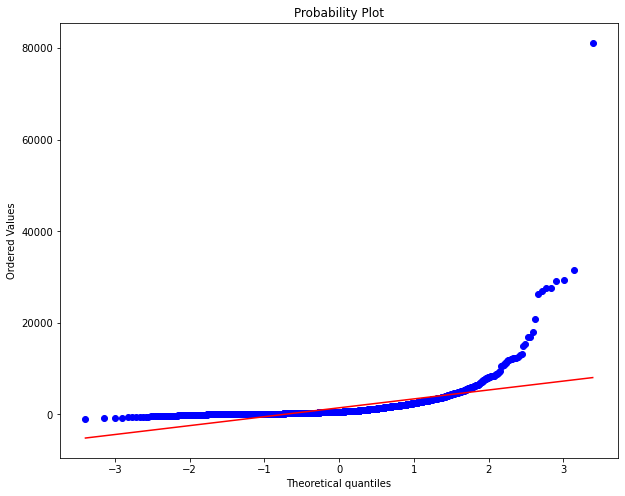

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
stats.probplot(df.balance, plot=ax)

Relatively speaking, the values track the normal line for a large number of the values, but then the high balances throw the normal distribution off so we don't have a 'normal' distribution. It would be interesting to see if we have a normal distribution as far as the age profile of the banks clients is concerned. In order to do that we'd have to clean the age data as we know there are NaN values in there and statistical testing requires entirley numerical data as can be seen by performing the following statistical analysis. 

In [18]:
stats.kstest(df.age, cdf="norm")

KstestResult(statistic=nan, pvalue=nan)

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([18., 19., 19., ..., nan, nan, nan])),
 (nan, nan, nan))

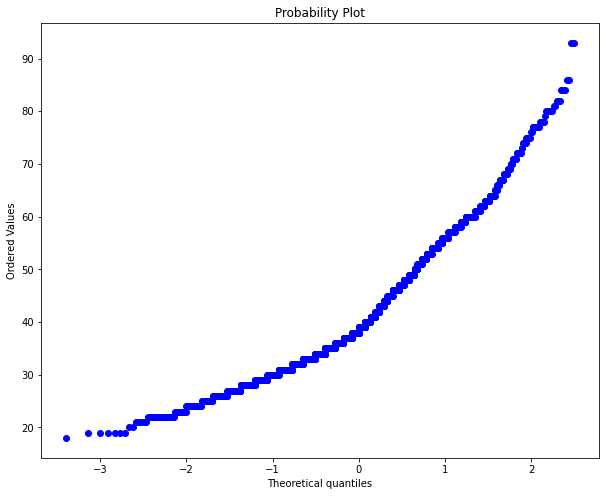

In [19]:
fig,ax = plt.subplots(figsize=(10,8))
stats.probplot(df.age, plot=ax)

It was at this point I decided to look at cleaning up the data and deal with missing values. Sensibly, this should've been done at an earlier stage but I'm doing it now as I've reached a point where I need the data in a cleaner format. There are a few options here; I could drop any row that had a missing value for any attribute, I could fill missing values using something like fillna(mean_value) which will work on numerical data and use another imputation method for categorical columns. 
Or, we could use an ML technique to predict missing data. 


In [20]:
df2 = df.dropna(axis=0, how='any', inplace=False) 
# Now any rows with at least 1 missing value have been dropped
# by assigning axis = 0 we iterate over the rows, how can take an 'any' or 'all' value and this is how rows
# are dropped - if any value is missing drop that row, if all values are missing drop that row. 
# The inplace parameter if False will drop from the existing df and saves the changes in the dataframe,
# if True it's an inplace operation and the return is None. 

In [21]:
profile_2 = ProfileReport(df2, explorative=True, dark_mode=True)
profile_2.to_file('output_2.html')

Summarize dataset:   0%|          | 0/31 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

What we find if we drop all rows with missing cells is that our data goes from 2000 rows of data to 1452 rows of data - we've lost over 25% of our data. Currently I'm working with age and balance; balance has no missing data and age has 12 missing values - throwing away 25% of the data because of 12 missing data points seems extreme (I could of course just get rid of the rows with missing age data, but let's explore imputing the data with some ML techniques). As I'm going to use a Linear Regression model to preidct the missing age data, ideally we should use attributes with a strong degree of correlation with age as inputs but as seen above and again here below there isn't a huge amount of correlation between the attributes so let's use all the numerical attributes.


In [22]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.139874,0.042411,0.076732,-0.002876,0.009121,0.063805
balance,0.139874,1.000000,0.037078,0.096633,0.025103,-0.033014,0.030292
day,0.042411,0.037078,1.000000,0.058597,-0.019719,0.054188,0.063716
duration,0.076732,0.096633,0.058597,1.000000,-0.005188,-0.095650,-0.015965
campaign,-0.002876,0.025103,-0.019719,-0.005188,1.000000,0.030929,0.140995
pdays,0.009121,-0.033014,0.054188,-0.095650,0.030929,1.000000,0.218636
previous,0.063805,0.030292,0.063716,-0.015965,0.140995,0.218636,1.000000


In [23]:
# Renaming the dataframe as data for ease of reading/understanding and for manipulation
data = df

# Adding the subscribed categorical data as a numerical value
data['subnum'] = data['subscribed'].map({'yes':1, 'no':0})

#Subestting out the numerical/continuous data - not going to use categorical data
data = data.select_dtypes(include=np.number)

test_data = data[data["age"].isnull()]

data = data.dropna() #Get rid of all null values in our data set


y_train= data["age"] #Get the rows from our age data with non-null values

X_train = data.drop("age", axis=1) # dataset except age data with non null values

X_test = test_data.drop("age", axis=1) # dataset except age data with null values

model = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

df.loc[df.age.isnull(), 'age'] = y_pred #Assign the predicted values to the missing values in the dataframe 

Now that we've filled in the missing age data we can have a look to see if the age data is a normal distribution. 

In [24]:
stats.kstest(df.age, cdf="norm")

KstestResult(statistic=1.0, pvalue=0.0)

Again, with a p<0.05 we reject the null hypothesis of a normal population distribution. 

((array([-3.39232293, -3.14126578, -3.00201262, ...,  3.00201262,
          3.14126578,  3.39232293]),
  array([18., 19., 19., ..., 86., 93., 93.])),
 (12.342534358873628, 41.749937593357686, 0.9716694454428927))

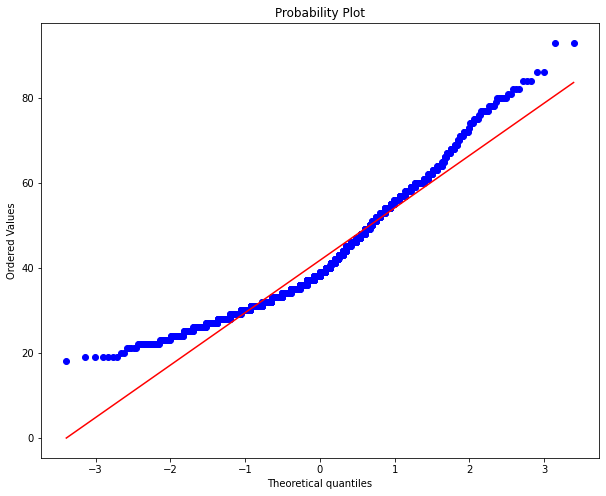

In [25]:
fig,ax = plt.subplots(figsize=(10,8))
stats.probplot(df.age, plot=ax)

Next I wanted to adjust the data for outliers. (As I'm exploring the data and currently don't intend on modelling the data this will have a significant impact on how we want to treat outliers). As the bank balance is a source of an annoying outlier I'm going to concentrate on that part of the data for now. 

In [26]:
df[['balance']].describe()

,balance
count,2000.000000
mean,1413.663500
std,3131.224213
min,-980.000000
25%,201.500000
50%,551.000000
75%,1644.500000
max,81204.000000


In [27]:
q1 = df['balance'].quantile(0.25)
q3 = df['balance'].quantile(0.75)
iqr = q3 - q1
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

In [28]:
print(lower_lim)
print(upper_lim)

-1963.0
3809.0


In [29]:
df['balance'].quantile(0.01)

-367.08

In [30]:
df['balance'].quantile(0.98)

8304.0

In [31]:
#Using the winsorize method to limit outliers with an upper and lower limit which will be similar to the 
# iqr method calculated above

df_balance_win = winsorize(df['balance'], (0.01, 0.02)) #The boundary tuple given as a second argument to the function applies
#the exact point on percentile from the beginning for the first element of the tuple and the exact point from the 
#end for the second element of the tuple. 

If we look at the bank balances graphically again with the windsorised masked array:

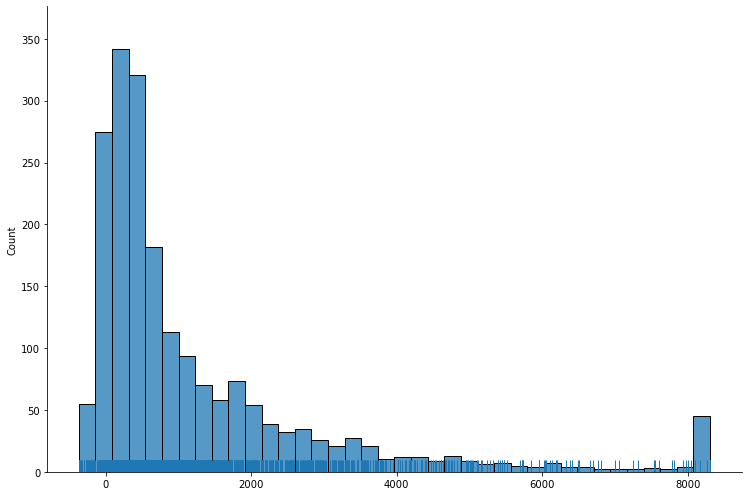

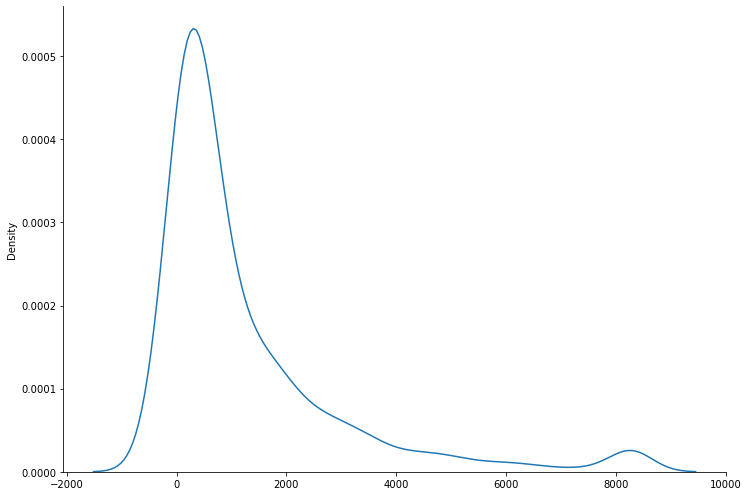

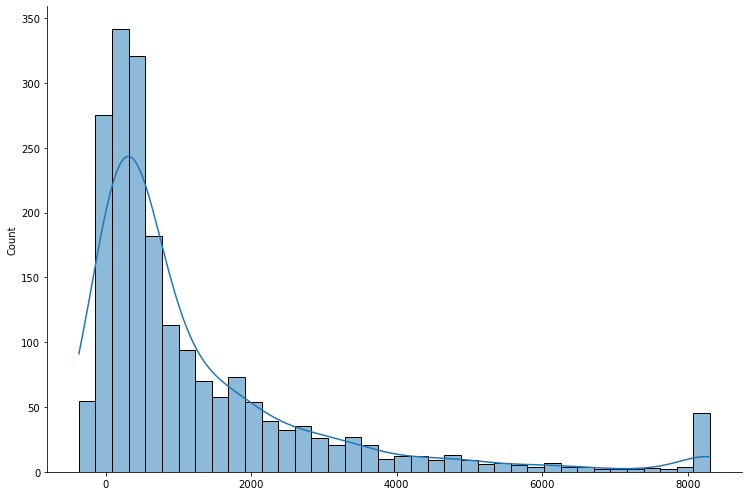

In [32]:
sns.displot(df_balance_win, kind='hist', height = 7, aspect = 1.5, rug=True)
sns.displot(df_balance_win, kind='kde', height = 7, aspect = 1.5, rug=False)
sns.displot(df_balance_win, kind='hist', height = 7, aspect = 1.5, kde=True)

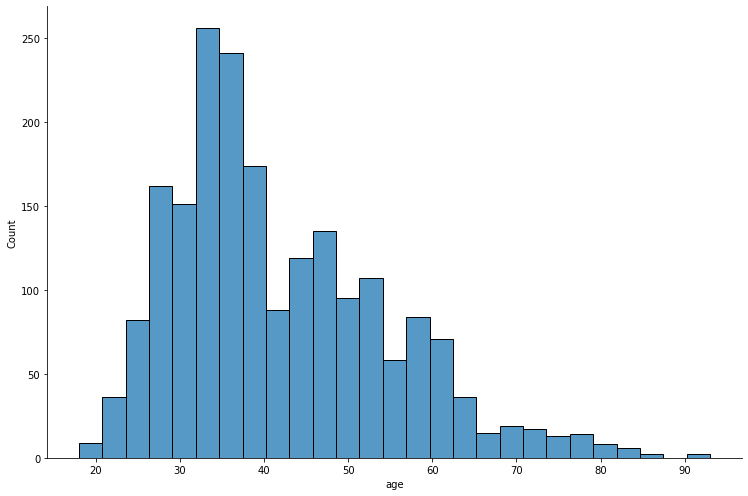

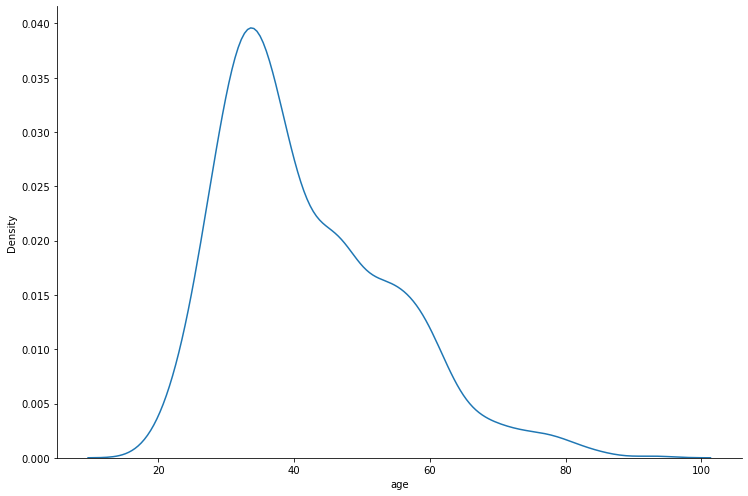

In [33]:
sns.displot(df.age, kind='hist', height = 7, aspect = 1.5)
sns.displot(df.age, kind='kde', height = 7, aspect = 1.5)

Above we have a Histogram and Kernel Density Estimation Plot of age which again we can superimpose as a smooth KDE ontop of the Hisotgram

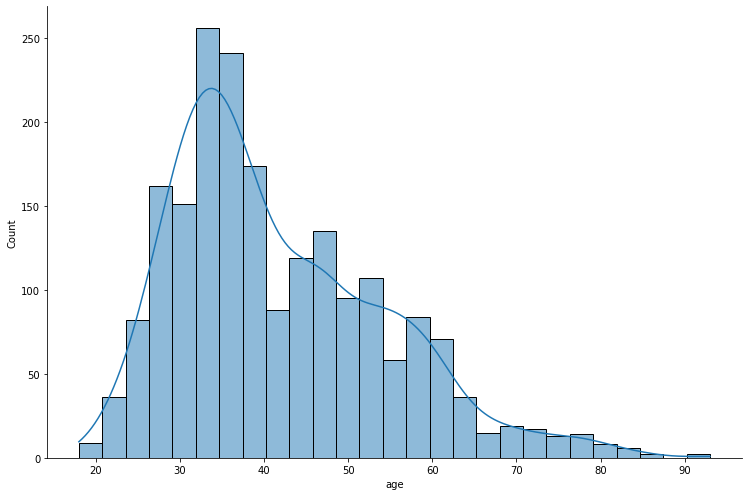

In [34]:
sns.displot(df.age, kind='hist', height = 7, aspect = 1.5, kde=True)

<AxesSubplot:>

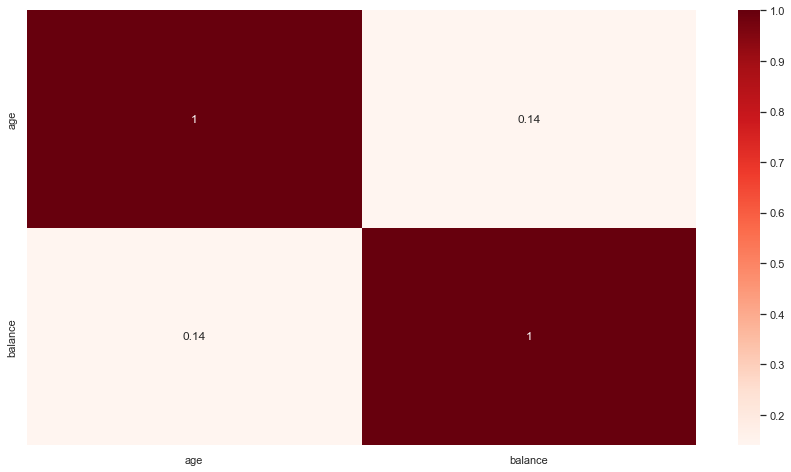

In [35]:
#Let's explore a heatmap distribution of age and bank balance

sns.set(rc = {'figure.figsize': (15,8)})
sns.heatmap(df[['age', 'balance']].corr(), cmap="Reds", annot=True)

Not very exciting and not a huge amount of information here other than to say that there is a 0.14 correlation between the age and bank balance which is marginally more than absolutely zero linear correlation between these values. 

### EDA of Categorical Attributes

Calculate statistics for the categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell)

I have commented and discussed in different markdown cells on the categorical statistics as I go through each of the points. 

In [36]:
# We can select all categorical attributes by selecting object datatypes from the df

print(df.select_dtypes(object).columns)

# With the cardinality of the catergorical attributes determined by:

df.marital.nunique()

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')


3

In [37]:
df['job'].count()

1990

In [38]:
 df['job'].value_counts()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64

In [39]:
df.job.isna().sum()

10

We don't have data on the jobs of 10 clients, which we can see from both counting the number who have a job and counting the number who do not have a job. 
I wonder if any of those 10 individuals have either a personal or a housing loan as I'd love to know how to get a loan without telling the bank your employment status or nature of your job.

In [40]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subnum
0,32.0,technician,single,tertiary,no,392,yes,no,cellular,1,apr,957,2,131,2,failure,no,0
1,39.0,technician,divorced,secondary,no,688,yes,yes,cellular,1,apr,233,2,133,1,failure,no,0


In [41]:
no_job_and_has_a_loan = df[df.job.isna() & ( (df['housing'] == 'yes') | (df['loan'] == 'yes') )]
no_job_and_has_a_loan.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,subnum
255,42.0,NaN,single,primary,no,2398,yes,no,cellular,3,feb,144,2,271,2,failure,no,0
831,41.0,NaN,single,primary,no,2398,yes,no,NaN,8,may,287,2,-1,0,NaN,no,0


As can be seen there's a 41 and a 42 year old with exactly the same bank balance, a primary level education and a housing loan each and the bank doesn't even know what they do for a living to earn the money to pay the bank for the housing loan. Considering relocating to Portugal.  

In [42]:
# Let's look a bit deeper at the non-numerical or categorical data

df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,subscribed
count,1990,2000,1896,2000,2000,2000,1809,2000,1546,2000
unique,11,3,3,2,2,2,2,12,3,2
top,management,married,secondary,no,no,no,cellular,feb,failure,no
freq,461,1111,995,1985,1037,1750,1663,404,955,1000


From this quick analysis of the non numerical or categorical attributes we can see that over half the banks clients are married, nearly half have a secondary level education, management is the most common job and the greatest number of clients were contacted last in February.

Let's focus in on the job category, 

In [43]:
#Replacing the NaN values with 'other'
df['job'] = df['job'].fillna('other')

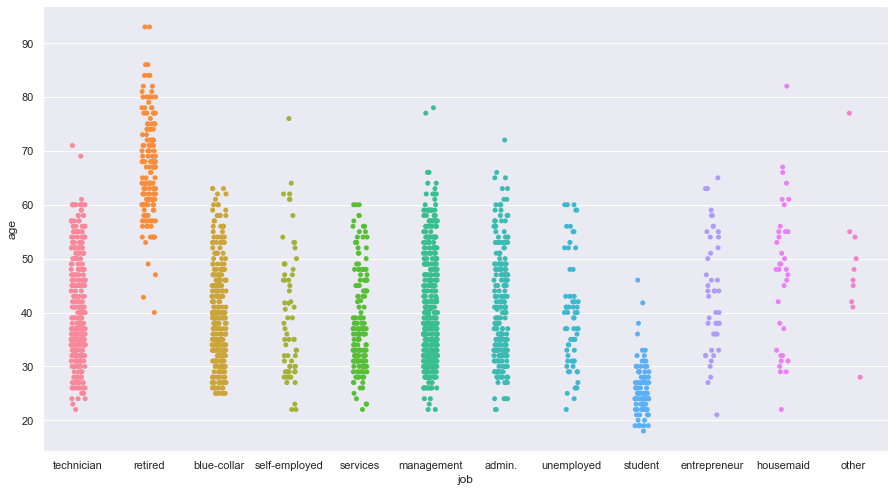

In [44]:
sns.catplot(data=df, x="job", y="age", height = 7, aspect = 1.8)

Plotting job against age we can see a trend in that those who are retired are older and students are younger - 'we hold all truths to be self evident'. 
Technician, blue-collar, management and admin appear to have roughly the same quantity but we know that management accounts for the job title of roughly 1/4 of the sample group. An alternative plot may make this more clear.

<AxesSubplot:xlabel='age', ylabel='job'>

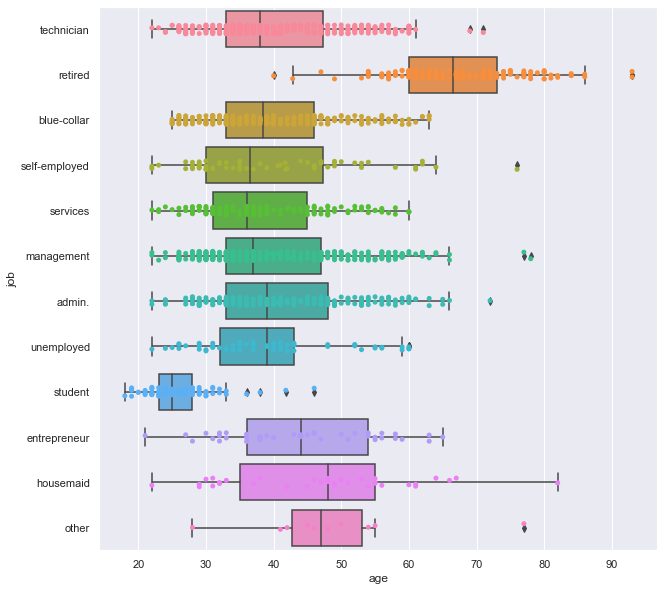

In [45]:
df2 = df[["age", "job"]]

f, ax = plt.subplots(figsize=(10,10))

sns.boxplot(data = df2, x="age", y="job")
sns.stripplot(data = df2, x="age", y="job")


<AxesSubplot:>

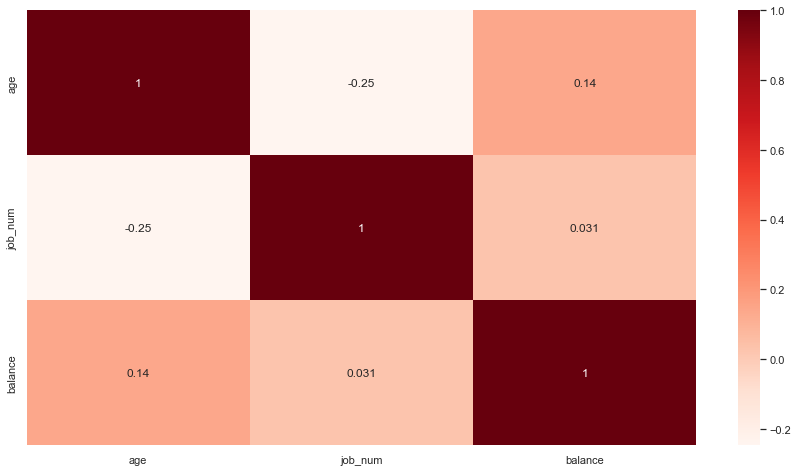

In [46]:
jobs_map = {
    'technician':1,
    'retired':2,
    'blue-collar':3,
    'self-employed':4,
    'services':5,
    'management':6,
    'admin':7,
    'unemployed':8,
    'student':9,
    'entrepeneur':10,
    'housemaid':11,
    'other':12
    
}

df['job_num'] = df['job'].map(jobs_map)
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(df[['age', 'job_num', 'balance']].corr(), cmap="Reds", annot=True)

Mapping the jobs to numbers to assess for correlation between age, balance and job shows no significant correlation between these entities. 
Is there any significant correlation to be noted when we add the outcome to the heatmap?

<AxesSubplot:>

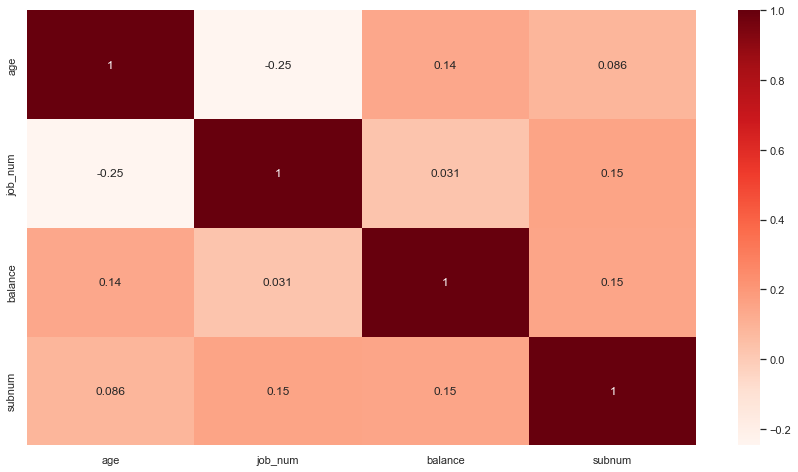

In [47]:

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df[['age', 'job_num', 'balance', 'subnum']].corr(), cmap="Reds", annot=True)

All that really can be said from this is that both the categorical job field and the numerical balance field have an equal but very small positive 0.15 correlation with whether an individual subscribed for a deposit account or not. 

<AxesSubplot:>

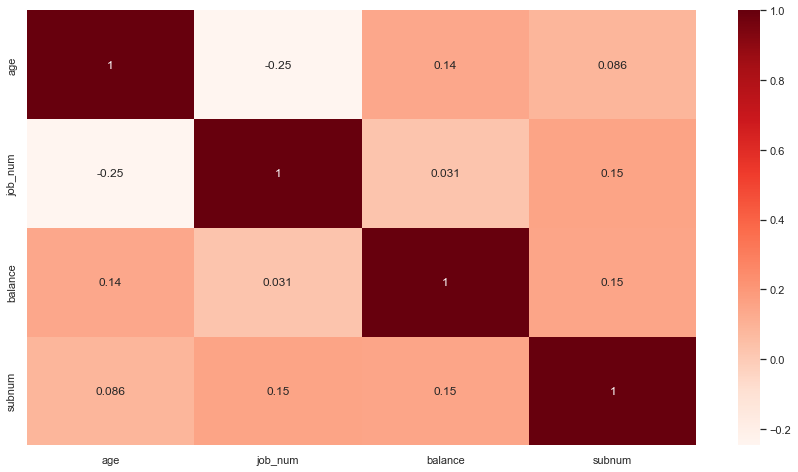

In [53]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df[['age', 'job_num', 'balance', 'subnum']].corr(), cmap="Reds", annot=True)